<a href="https://colab.research.google.com/github/haddriax/CIFAR-10_classifier/blob/main/cifar_10_heavy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow import keras
from keras import layers, models, regularizers

In [94]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
(x_val, y_val) = (x_train[-10000:], y_train[-10000:])
(x_train, y_train) = (x_train[:-10000], y_train[:-10000])

assert x_train.shape == (40000, 32, 32, 3)
assert x_val.shape == (10000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (40000, 1)
assert y_val.shape == (10000, 1)
assert y_test.shape == (10000, 1)

In [95]:
model = models.Sequential([
    layers.Input(shape=(32, 32, 3)),

    layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),

    layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),

    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),

    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),

    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),

    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),

    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),

    # Output layer
    layers.Dense(10, activation='softmax')
])

In [96]:
best_model = None
best_accuracy = 0.0
monitor = 'val_loss'

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_77 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_81               │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_78 (Conv2D)                   │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_82               │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_36 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_79 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_83               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_80 (Conv2D)                   │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_84               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_37 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_81 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_85               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_82 (Conv2D)                   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_86               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_38 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_12 (Flatten)                 │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,605,674 (6.13 MB)

 Trainable params: 1,604,778 (6.12 MB)

 Non-trainable params: 896 (3.50 KB)

In [97]:
epochs = 200

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='saved_cnn.weights.h5',
    monitor=monitor,
    save_best_only=True,
    save_weights_only=True,
    verbose=1)

early_exit_callback = tf.keras.callbacks.EarlyStopping(
    monitor=monitor,
    patience=12,
    restore_best_weights=True,
    verbose=1)

lr_scheduler =  tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.9,
    patience=4,
    min_lr=1e-6)

history = model.fit(x_train,
                    y_train,
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    callbacks=[cp_callback, early_exit_callback, lr_scheduler]
                    )

Epoch 1/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4045 - loss: 2.1024
Epoch 1: val_loss improved from inf to 1.46461, saving model to saved_cnn.weights.h5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 11ms/step - accuracy: 0.4046 - loss: 2.1021 - val_accuracy: 0.5981 - val_loss: 1.4646 - learning_rate: 0.0010
Epoch 2/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6584 - loss: 1.2768
Epoch 2: val_loss improved from 1.46461 to 1.18691, saving model to saved_cnn.weights.h5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6584 - loss: 1.2767 - val_accuracy: 0.6879 - val_loss: 1.1869 - learning_rate: 0.0010
Epoch 3/200
1245/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7147 - loss: 1.1075
Epoch 3: val_loss improved from 1.18691 to 1.13807, saving model to saved_cnn.weights.h5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7147 - loss: 1.1075 - val_accuracy: 0.7215 - val_loss: 1.1381 - learning_rate: 0.0010
Epoch 4/200
1247/1250 ━━━━━━━━━━━━━━━━━

In [98]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8085 - loss: 0.9732
Loss:  0.9681497812271118
Accuracy:  0.8069999814033508


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


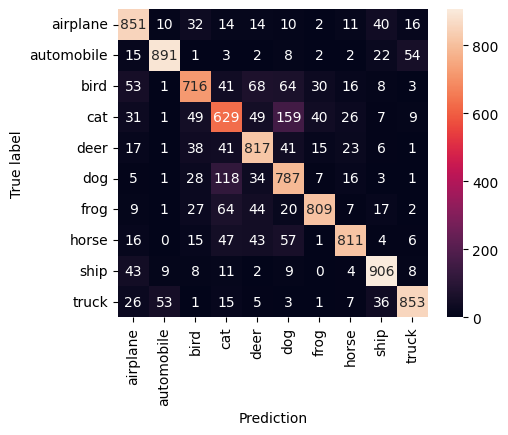

In [99]:
raw_prediction = model.predict(x_test)

y_pred = np.argmax(raw_prediction, axis=1)

y_true = np.concatenate([y for x, y in zip(x_test, y_test)], axis=0)

import seaborn as sns

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

confusion_mtx = tf.math.confusion_matrix(y_true, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_mtx, xticklabels=class_names, yticklabels=class_names,
            annot=True, fmt='g')

plt.xlabel('Prediction')
plt.ylabel('True label')
plt.show()

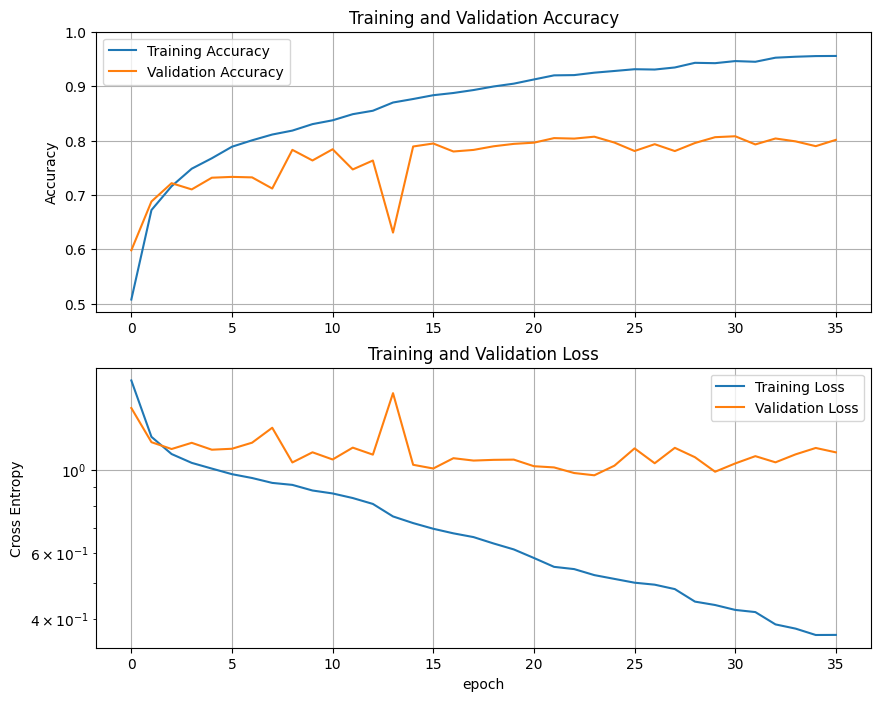

In [100]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.grid()
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.yscale('log')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.grid()
plt.show()

In [101]:
base_model = model.load_weights('saved_cnn.weights.h5')
loss,accuracy = model.evaluate(x_test, y_test)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8085 - loss: 0.9732
Loss:  0.9681497812271118
Accuracy:  0.8069999814033508


In [102]:
model.trainable = True
print("Number of layers in the base model: ", len(model.layers))

fine_tune_at = 14

for layer in model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  21


In [103]:
base_learning_rate = 0.001
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate/100),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'])

In [104]:
initial_epochs = 20
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath='saved_tl.weights.h5',
                                                 monitor='val_loss',
                                                 save_best_only=True,
                                                 save_weights_only=True,
                                                 verbose=1)

early_exit_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1)

history = model.fit(x_train, y_train,
                    epochs=initial_epochs,
                    validation_data=(x_val, y_val), # Use validation data here
                    callbacks=[cp_callback, early_exit_callback]
                    )

Epoch 1/20
1245/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9361 - loss: 0.1887
Epoch 1: val_loss improved from inf to 0.64871, saving model to saved_tl.weights.h5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9361 - loss: 0.1886 - val_accuracy: 0.8124 - val_loss: 0.6487
Epoch 2/20
1247/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9421 - loss: 0.1681
Epoch 2: val_loss improved from 0.64871 to 0.64411, saving model to saved_tl.weights.h5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9421 - loss: 0.1681 - val_accuracy: 0.8147 - val_loss: 0.6441
Epoch 3/20
1246/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9463 - loss: 0.1585
Epoch 3: val_loss improved from 0.64411 to 0.64271, saving model to saved_tl.weights.h5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9463 - loss: 0.1584 - val_accuracy: 0.8170 - val_loss: 0.6427
Epoch 4/20
1246/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9474 - loss: 0.1542
Epoch 4: val_loss did not imp

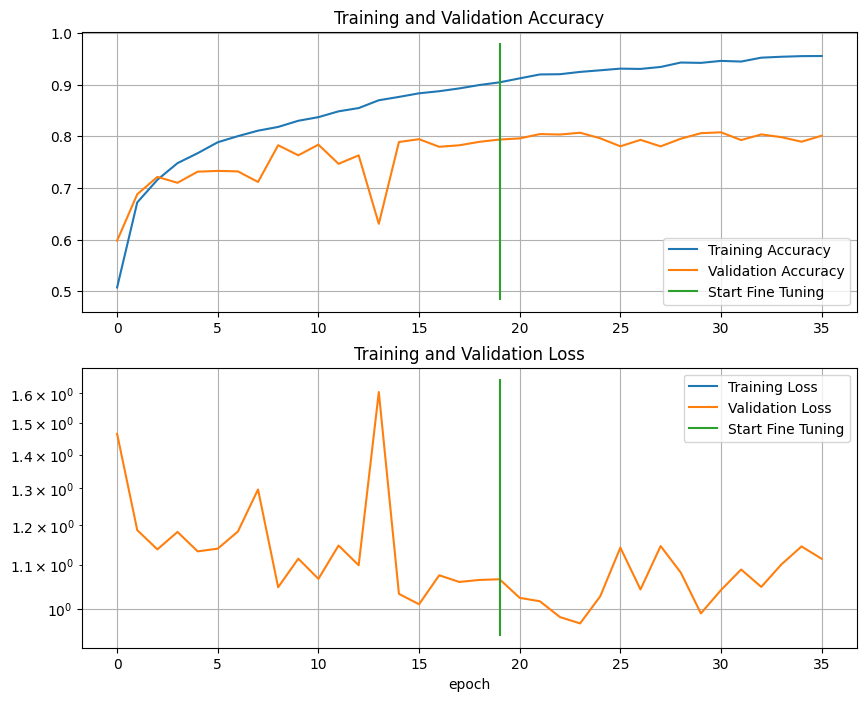

In [105]:
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.grid()
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.yscale('log')
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.grid()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


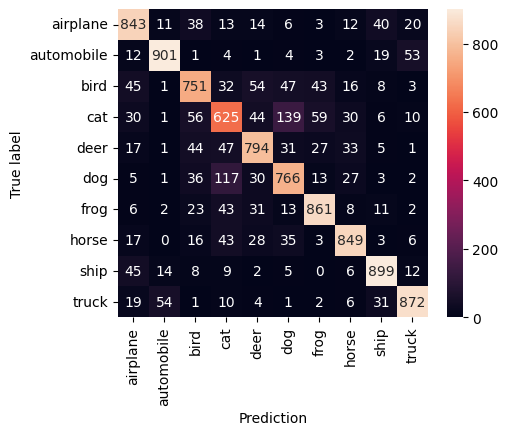

In [106]:
raw_prediction = model.predict(x_test)

y_pred = np.argmax(raw_prediction, axis=1)

y_true = np.concatenate([y for x, y in zip(x_test, y_test)], axis=0)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

confusion_mtx = tf.math.confusion_matrix(y_true, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_mtx, xticklabels=class_names, yticklabels=class_names,
            annot=True, fmt='g')

plt.xlabel('Prediction')
plt.ylabel('True label')
plt.show()

In [107]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss: ", loss)
print("Test Accuracy: ", accuracy)

loss, accuracy = model.evaluate(x_val, y_val)
print("Vali Loss: ", loss)
print("Vali Accuracy: ", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8162 - loss: 0.6605
Test Loss:  0.6505515575408936
Test Accuracy:  0.816100001335144
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8121 - loss: 0.6416
Vali Loss:  0.6427133679389954
Vali Accuracy:  0.8169999718666077


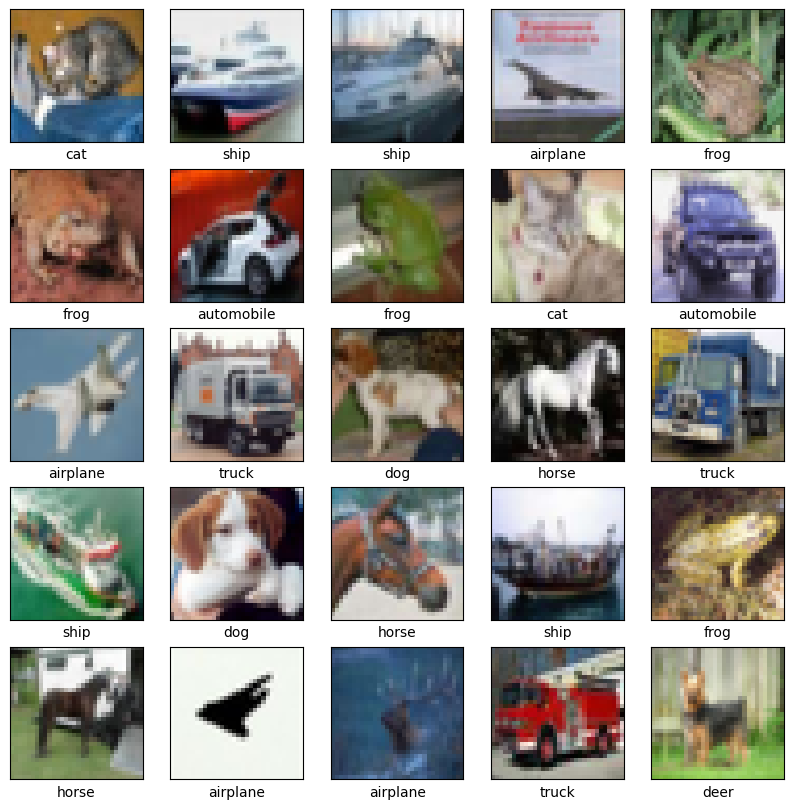

In [108]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])
    plt.xlabel(class_names[y_pred[i]])
plt.show()